##  Selective Search를 이용한  Region Proposal

https://m.blog.naver.com/laonple/220918802749

## Region proposals
- **유사도 기반으로 물체가 있을 법한 영역의 위치(좌표) 제안**하는 물체 탐색 알고리즘
-  전체를 탐색하는 것이 아니기 때문에 search space가 줄어들어 때문에 비교적 빠른 속도로 object detection을 수행  
  예) selective serach 

# Object Detection 
  - classification+  localization
    - 영역
        - window sliding
        - regional proposals : 물체가 있을 만한 **영역 찾음**
        - 지도학습 regression 4가지 좌표값 예측
     - 영역 내에 무엇이 있는지

#### Selective Search
- 전체 영역에서  **4가지 유사도 색상, 텍스쳐, 사이즈, fill** 기반으로 그것들을 둘러싸는 다양한 크기의 window 찾음
- python seletive-search 참고: https://pypi.org/project/selective-search/
    - mode: `single`, `fast`, `quality`  
    - Similarity m`asure :CTSF (color, texture, size, fill)
    - Starting Regions(k)
    - Number of combination 1,8,80

- **hierachial grouping**algorithm
  - 유사도 높은것끼리 서로 합쳐서 크기 점점 확장해서 물체가 있을만한 영역 잡음

- Capture all scales 
- Diversification(다각화)
- faster computation

(512, 512, 3)


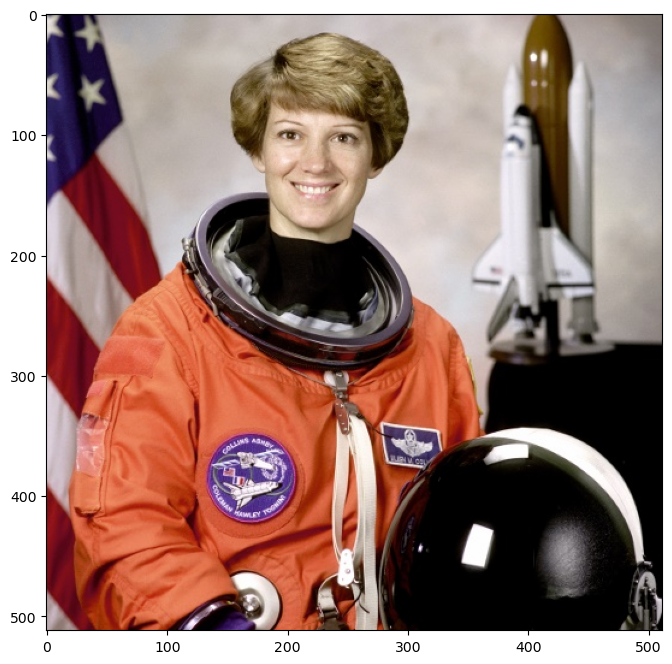

In [21]:
# ! pip install selectivesearch
# ! pip install opencv-python
import selectivesearch
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 이미지를 cv2로 로드하고 matplotlib으로 시각화 
img = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img_rgb.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

In [13]:
_,regions = selectivesearch.selective_search(img_rgb,scale=100,min_size=2000)
print(type(regions),len(regions))

<class 'list'> 58


#### 반환된 Region Proposal(후보 영역)에 대한 정보 보기. 
반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음. 
개별 딕셔너리내 KEY값별 의미
* rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임. 
* size는 Bounding box의 크기
* labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
* 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐. 

In [17]:
regions

[{'rect': (0, 0, 63, 154), 'size': 6540, 'labels': [0.0]},
 {'rect': (26, 0, 217, 226), 'size': 22316, 'labels': [1.0]},
 {'rect': (228, 0, 181, 350), 'size': 27252, 'labels': [2.0]},
 {'rect': (389, 0, 46, 184), 'size': 5238, 'labels': [3.0]},
 {'rect': (419, 0, 92, 283), 'size': 21870, 'labels': [4.0]},
 {'rect': (192, 16, 99, 56), 'size': 3439, 'labels': [5.0]},
 {'rect': (154, 23, 112, 157), 'size': 9159, 'labels': [6.0]},
 {'rect': (234, 45, 65, 84), 'size': 2440, 'labels': [7.0]},
 {'rect': (357, 85, 46, 186), 'size': 4285, 'labels': [8.0]},
 {'rect': (392, 85, 63, 163), 'size': 2623, 'labels': [9.0]},
 {'rect': (186, 87, 106, 102), 'size': 3022, 'labels': [10.0]},
 {'rect': (0, 113, 94, 124), 'size': 4509, 'labels': [11.0]},
 {'rect': (0, 148, 77, 125), 'size': 4570, 'labels': [12.0]},
 {'rect': (133, 154, 162, 110), 'size': 9261, 'labels': [13.0]},
 {'rect': (113, 155, 273, 209), 'size': 14995, 'labels': [14.0]},
 {'rect': (57, 203, 87, 128), 'size': 4053, 'labels': [15.0]},
 {

In [20]:
# rect만 추출
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects) # 58개

[(0, 0, 63, 154), (26, 0, 217, 226), (228, 0, 181, 350), (389, 0, 46, 184), (419, 0, 92, 283), (192, 16, 99, 56), (154, 23, 112, 157), (234, 45, 65, 84), (357, 85, 46, 186), (392, 85, 63, 163), (186, 87, 106, 102), (0, 113, 94, 124), (0, 148, 77, 125), (133, 154, 162, 110), (113, 155, 273, 209), (57, 203, 87, 128), (0, 219, 59, 126), (365, 231, 146, 253), (107, 248, 194, 187), (36, 254, 91, 121), (0, 303, 125, 156), (350, 322, 145, 133), (27, 329, 98, 90), (239, 334, 35, 177), (263, 336, 248, 175), (280, 345, 202, 139), (116, 368, 96, 88), (0, 394, 90, 117), (155, 423, 104, 88), (43, 426, 192, 85), (27, 254, 100, 165), (116, 368, 143, 143), (0, 254, 127, 205), (154, 23, 138, 166), (107, 248, 194, 263), (154, 16, 138, 173), (0, 203, 144, 256), (107, 248, 194, 263), (43, 248, 258, 263), (0, 113, 94, 232), (357, 85, 98, 186), (0, 203, 301, 308), (263, 336, 248, 175), (263, 231, 248, 280), (113, 85, 342, 279), (0, 0, 243, 273), (154, 16, 145, 173), (0, 0, 299, 273), (0, 0, 301, 511), (113,

### Bounding box를 시각화

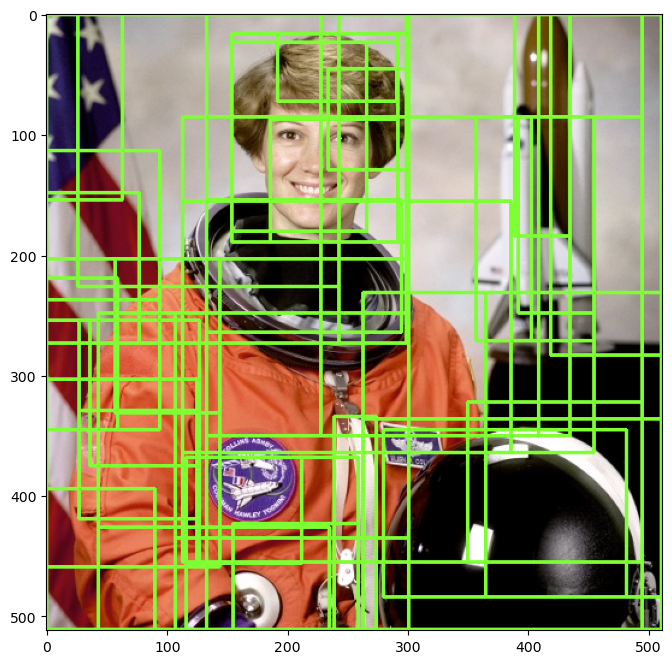

In [22]:
# rect: (x,y, width,height)
green_rgb = (125,255,51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects: # 58회
    left = rect[0]   # x1
    top = rect[1]    # y1

    right = left + rect[2]  # x2 = x1 + width
    bottom = top + rect[3]  # y2 = y1 + height

    img_rgb_copy = cv2.rectangle(img_rgb_copy,(left,top),(right,bottom),
                                 color=green_rgb,thickness=2)
    
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()    

### Bounding box 크기를 기준으로 큰 box만 추출

32


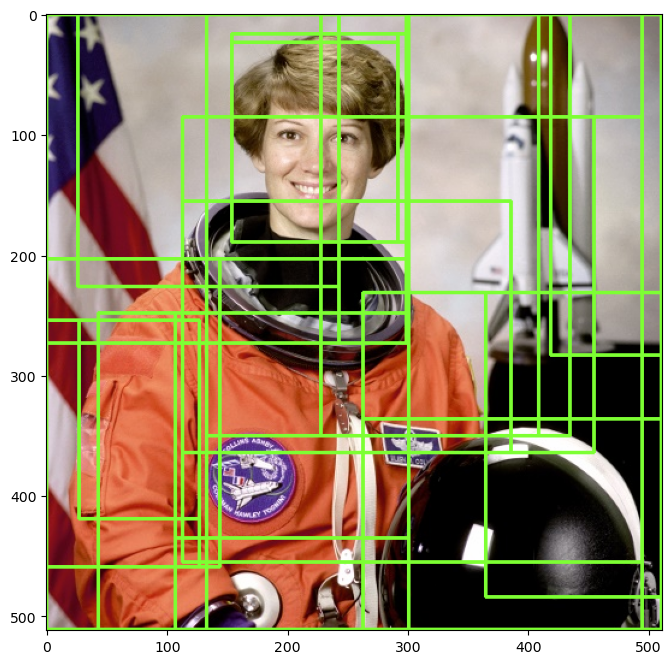

In [25]:
cand_rects = [cand['rect'] for cand in regions if cand['size'] > 10000]
print(len(cand_rects)) # 32개

green_rgb = (125,255,51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects: # 58회
    left = rect[0]   # x1
    top = rect[1]    # y1

    right = left + rect[2]  # x2 = x1 + width
    bottom = top + rect[3]  # y2 = y1 + height

    img_rgb_copy = cv2.rectangle(img_rgb_copy,(left,top),(right,bottom),
                                 color=green_rgb,thickness=2)
    
plt.figure(figsize=(8,8))
plt.imshow(img_rgb_copy)
plt.show()    

### IOU : Intersection over Union 구하기
- 모델이 예측한 결과와 실측(Ground Truth) Box가 얼마나 정확하게 겹치는가를 나타내는 지표 , 1.0이 최대값
- IOU가 0.5이면 예측성공으로 인정

![python image2](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwNXOK%2FbtqSpGVHmHc%2FKbsxRBSs6KymYB3PkEny21%2Fimg.png)

#### 입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [30]:
def compute_iou(cand_box,gt_box):
    # intersection areas 계산
    # (x1,y1) : intersection의 좌측 상단 위치
    x1 = np.maximum(cand_box[0],gt_box[0])
    y1 = np.maximum(cand_box[1],gt_box[1])
    
    # (x2,y2)  : intersection의 우측 하단 위치
    x2 = np.minimum(cand_box[2],gt_box[2])
    y2 = np.minimum(cand_box[3],gt_box[3])
    
    # 교집합의 넓이를 구한다
    intersection = np.maximum(x2-x1,0) * np.maximum(y2-y1,0)
    
    cand_box_area = (cand_box[2] - cand_box[0])*(cand_box[3] - cand_box[1])
    gt_box_area = (gt_box[2] - gt_box[0])*(gt_box[3] - gt_box[1])
    union = cand_box_area + gt_box_area - intersection
    
    iou = intersection/union
    return iou

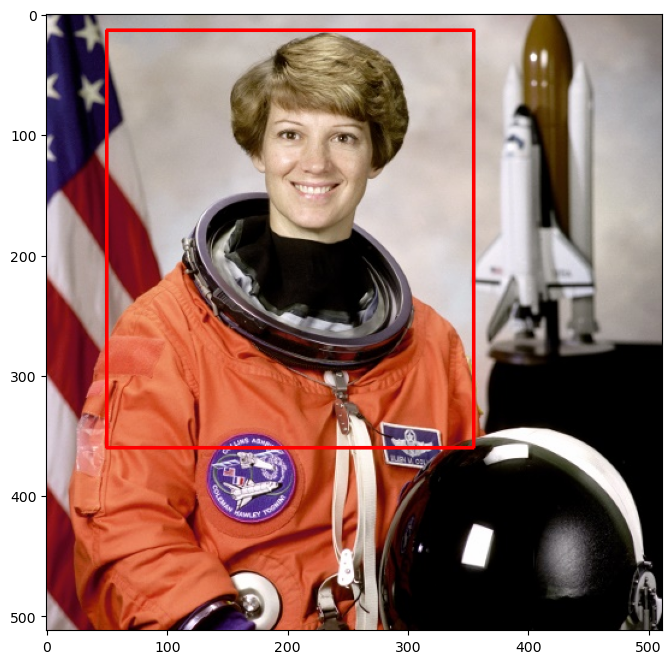

In [26]:
# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정. 

gt_box = [50,13,355,360]  # (x1,y1,x2,y2)

img = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red = (255,0,0)
img_rgb = cv2.rectangle(img_rgb,(gt_box[0],gt_box[1]),(gt_box[2],gt_box[3]),
                       color=red,thickness=2)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

In [27]:
_,regions = selectivesearch.selective_search(img_rgb,scale=100,min_size=2000) # scale :대상의 크기
print(type(regions),len(regions))

C:\Users\storm\anaconda3\envs\tf217\lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


<class 'list'> 62


In [31]:
cand_rects = [cand['rect'] for cand in regions]
print(len(cand_rects)) # 62개
for index,cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]  # x2 = x1 + width
    cand_box[3] += cand_box[1]  # y2 = y1 + height --->(x1,y1,x2,y2)

    iou = compute_iou(cand_box,gt_box)
    print('index:',index, 'IOU:',iou)

62
index: 0 IOU: 0.0
index: 1 IOU: 0.4909805406940959
index: 2 IOU: 0.0
index: 3 IOU: 0.0
index: 4 IOU: 0.9877920162773116
index: 5 IOU: 0.0
index: 6 IOU: 0.9755090471016205
index: 7 IOU: 0.33538999385836443
index: 8 IOU: 0.052383427032645154
index: 9 IOU: 0.31566117069022537
index: 10 IOU: 0.16614541503283412
index: 11 IOU: 0.051589738744271744
index: 12 IOU: 0.0
index: 13 IOU: 0.0
index: 14 IOU: 0.10215902111777768
index: 15 IOU: 0.050399206311711624
index: 16 IOU: 0.0
index: 17 IOU: 0.16837530117635943
index: 18 IOU: 0.3324514574573629
index: 19 IOU: 0.0
index: 20 IOU: 0.06330608966787925
index: 21 IOU: 0.04125289365521803
index: 22 IOU: 0.03531306790021477
index: 23 IOU: 0.037148300117233295
index: 24 IOU: 0.0
index: 25 IOU: 0.0016502154447941815
index: 26 IOU: 0.0
index: 27 IOU: 0.0
index: 28 IOU: 0.0
index: 29 IOU: 0.0
index: 30 IOU: 0.0
index: 31 IOU: 0.0
index: 32 IOU: 0.21645013464354892
index: 33 IOU: 0.0
index: 34 IOU: 0.04425376012340918
index: 35 IOU: 0.041864811546049215


In [32]:
cand_rects = [cand['rect']  for cand in regions if cand['size'] > 5000]
cand_rects.sort()
cand_rects

[(0, 0, 47, 196),
 (0, 0, 409, 511),
 (0, 0, 511, 511),
 (0, 0, 511, 511),
 (0, 0, 511, 511),
 (0, 0, 511, 511),
 (0, 0, 511, 511),
 (0, 13, 48, 331),
 (0, 13, 353, 498),
 (0, 15, 353, 496),
 (0, 203, 301, 308),
 (0, 303, 125, 156),
 (0, 303, 274, 208),
 (23, 333, 196, 110),
 (23, 333, 248, 141),
 (23, 333, 251, 178),
 (23, 333, 251, 178),
 (26, 0, 383, 217),
 (26, 0, 383, 220),
 (26, 0, 383, 304),
 (43, 424, 193, 87),
 (49, 12, 307, 349),
 (49, 12, 462, 472),
 (49, 12, 462, 472),
 (52, 15, 301, 343),
 (52, 15, 301, 343),
 (52, 203, 249, 155),
 (52, 203, 249, 155),
 (53, 16, 174, 204),
 (74, 203, 227, 155),
 (133, 154, 162, 110),
 (154, 16, 138, 173),
 (154, 23, 112, 157),
 (154, 23, 138, 166),
 (155, 363, 119, 148),
 (236, 16, 116, 288),
 (272, 361, 239, 150),
 (283, 217, 228, 267),
 (283, 345, 212, 139),
 (283, 357, 199, 127),
 (357, 0, 154, 350),
 (357, 0, 154, 350),
 (357, 85, 98, 265),
 (357, 217, 154, 267),
 (389, 0, 46, 184),
 (419, 0, 92, 283)]

index: 4 iou: 0.9877920162773116 rectangle: (49, 12, 356, 361)
index: 50 iou: 0.9877920162773116 rectangle: (49, 12, 356, 361)


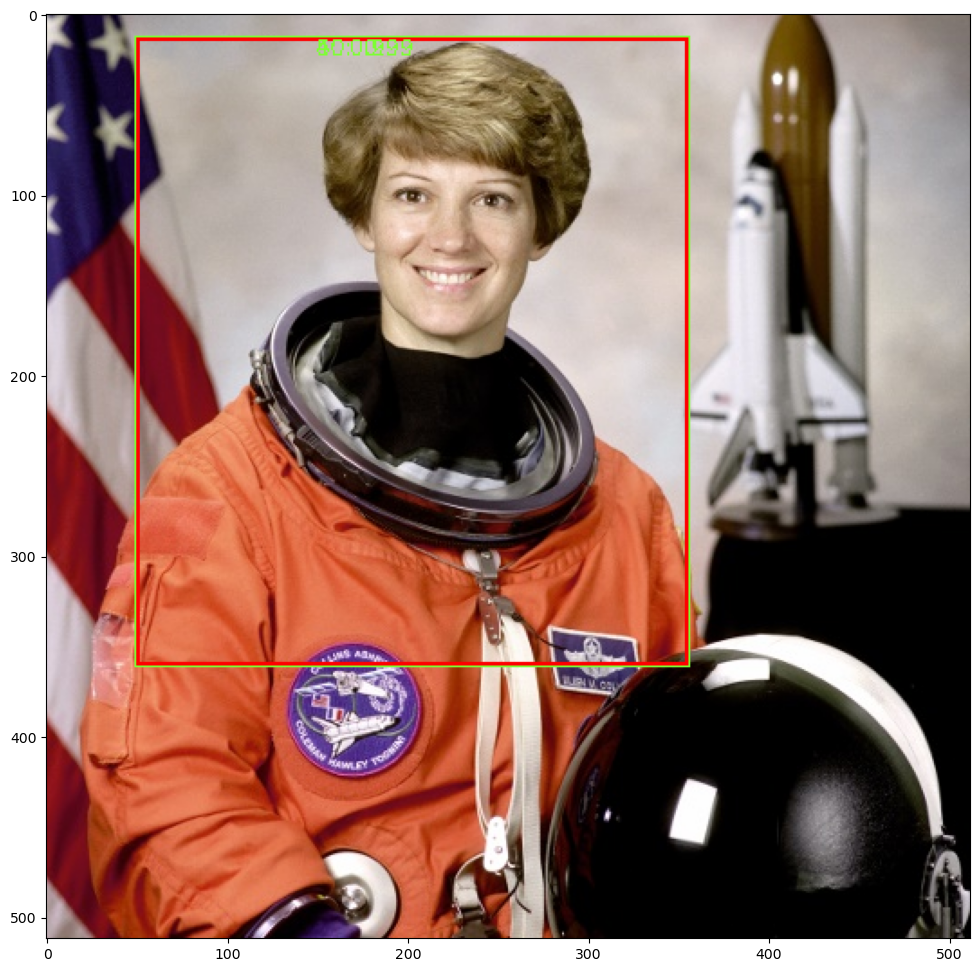

In [34]:
# IOU > 0.98 , size > 3000 인 box만 출력하기
img = cv2.imread('image.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gt_box = [50,13,355,360]  # (x1,y1,x2,y2)

green_rgb = (125,255,51)

cand_rects = [cand['rect']  for cand in regions if cand['size'] > 3000]

red = (255,0,0)
img_rgb = cv2.rectangle(img_rgb,(gt_box[0],gt_box[1]),(gt_box[2],gt_box[3]),
                       color=red,thickness=2)

for index,cand_box in enumerate(cand_rects):
    cand_box = list(cand_box)
    cand_box[2] += cand_box[0]   # x2 = x1 + width  
    cand_box[3] += cand_box[1]   # y2 = y1 + height  ,  --> (x1,y1,x2,y2)
    
    iou = compute_iou(cand_box,gt_box)
    
    if iou > 0.98:
        print('index:', index, "iou:", iou, 'rectangle:',(cand_box[0], cand_box[1], cand_box[2], cand_box[3]) )
        cv2.rectangle(img_rgb, (cand_box[0], cand_box[1]), (cand_box[2], cand_box[3]), color=green_rgb, thickness=1)
        text = "{}: {:.2f}".format(index, iou)
        cv2.putText(img_rgb, text, (cand_box[0]+ 100, cand_box[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_rgb, thickness=1)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.show()      